In [1]:
from m2_cw.inference import visualise_forecasts
from pathlib import Path
import json
import re
import pandas as pd
from functools import reduce

figpath = Path.cwd() / "figs"
figpath.mkdir(parents=True, exist_ok=True)


Experiment 3b - 7


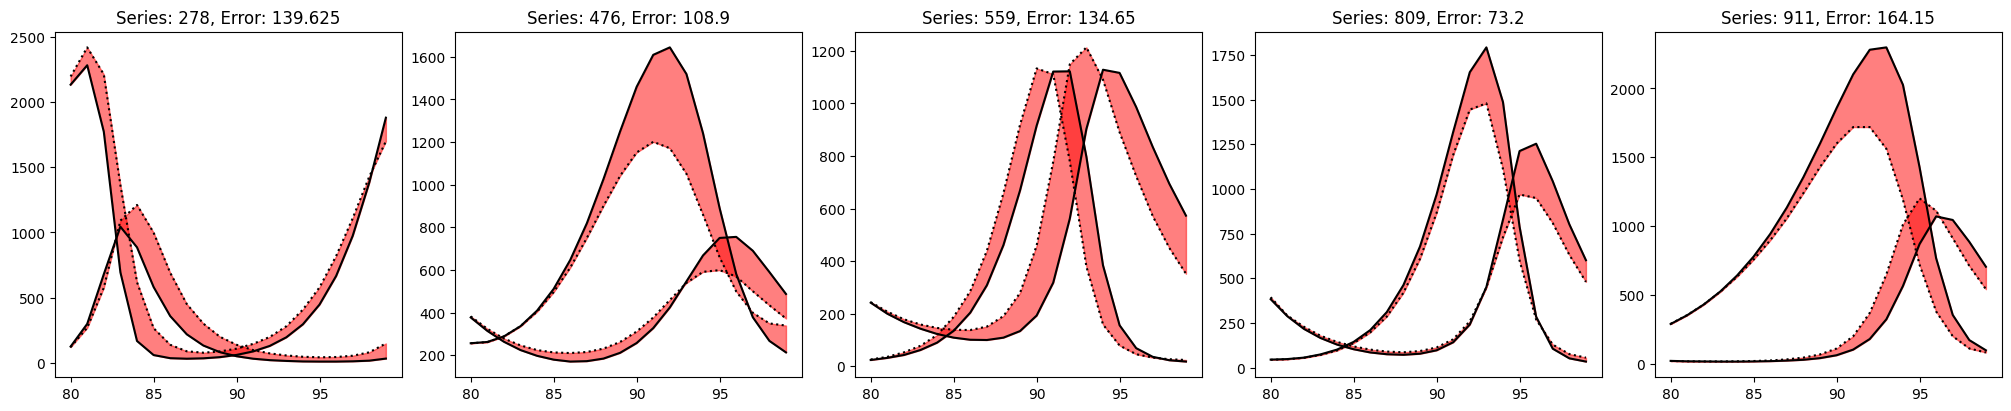

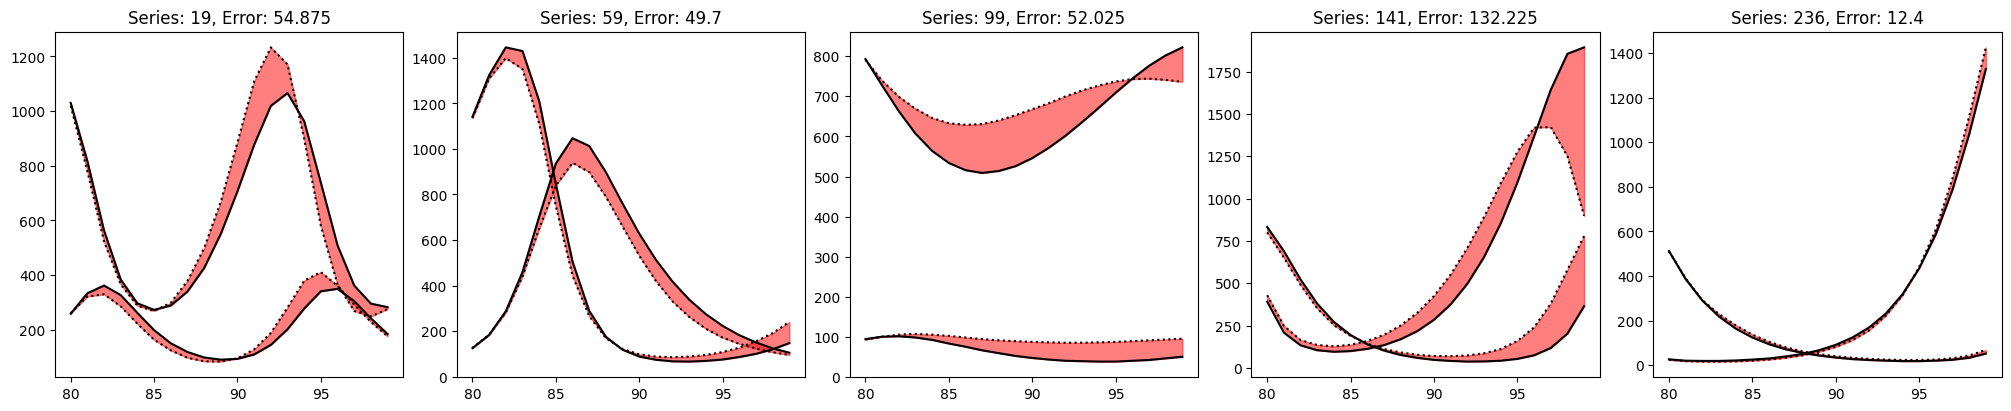

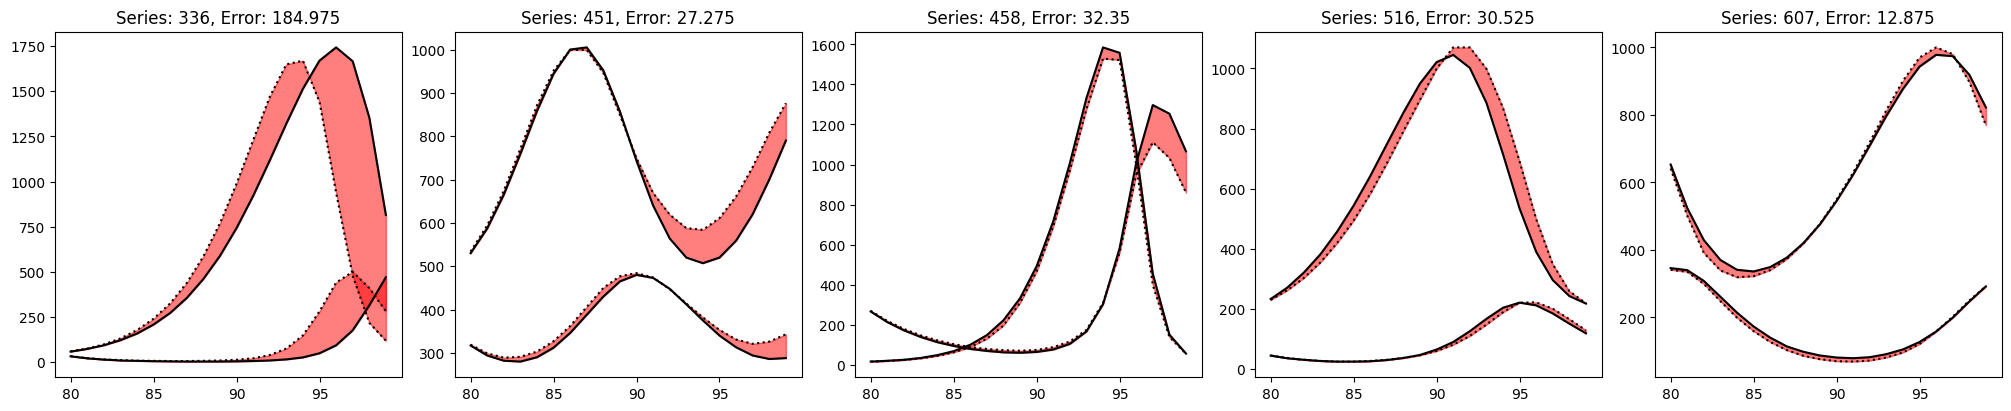

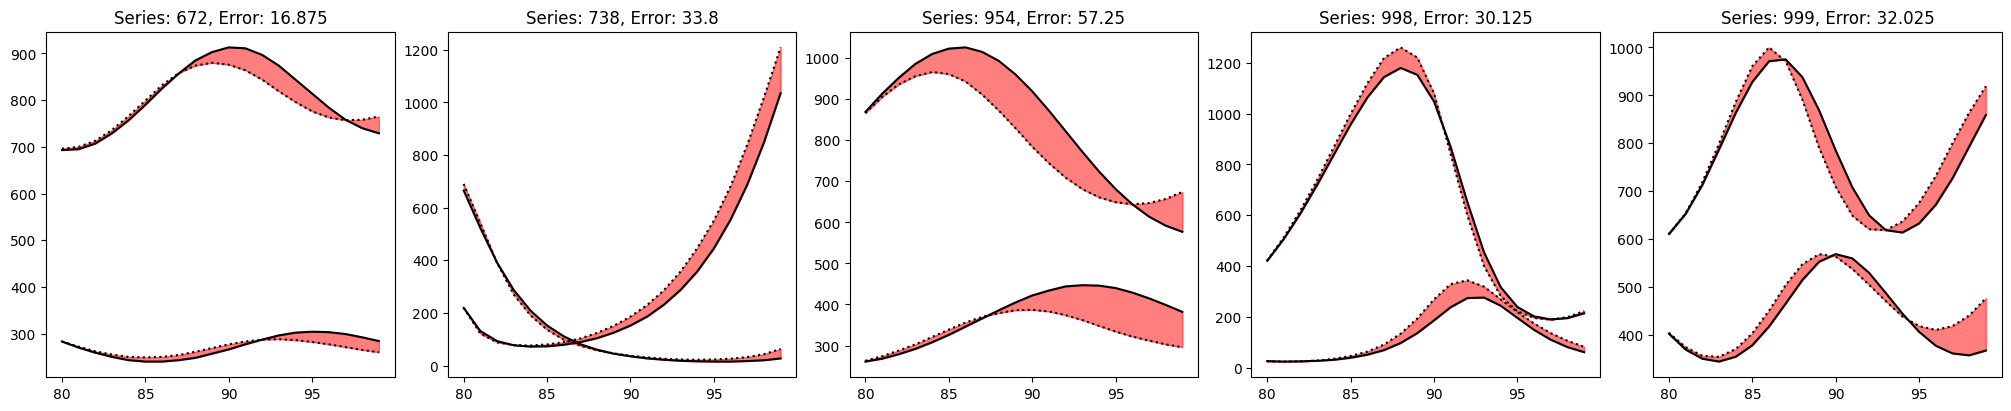


Experiment 3b - 8


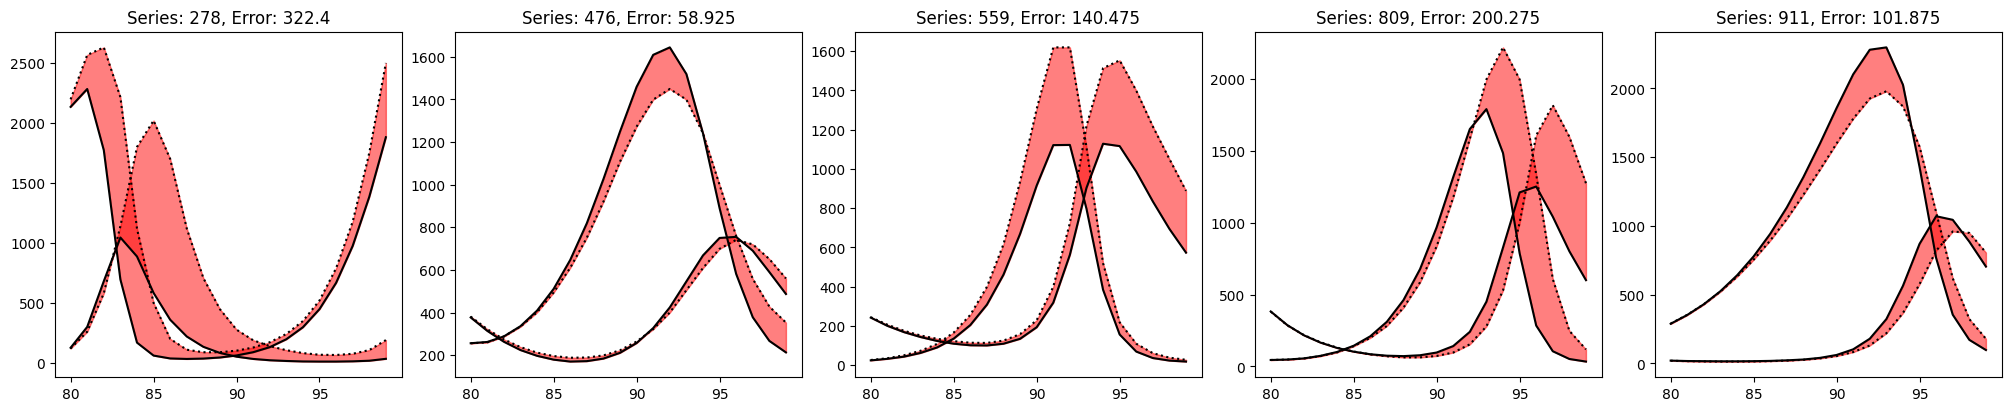

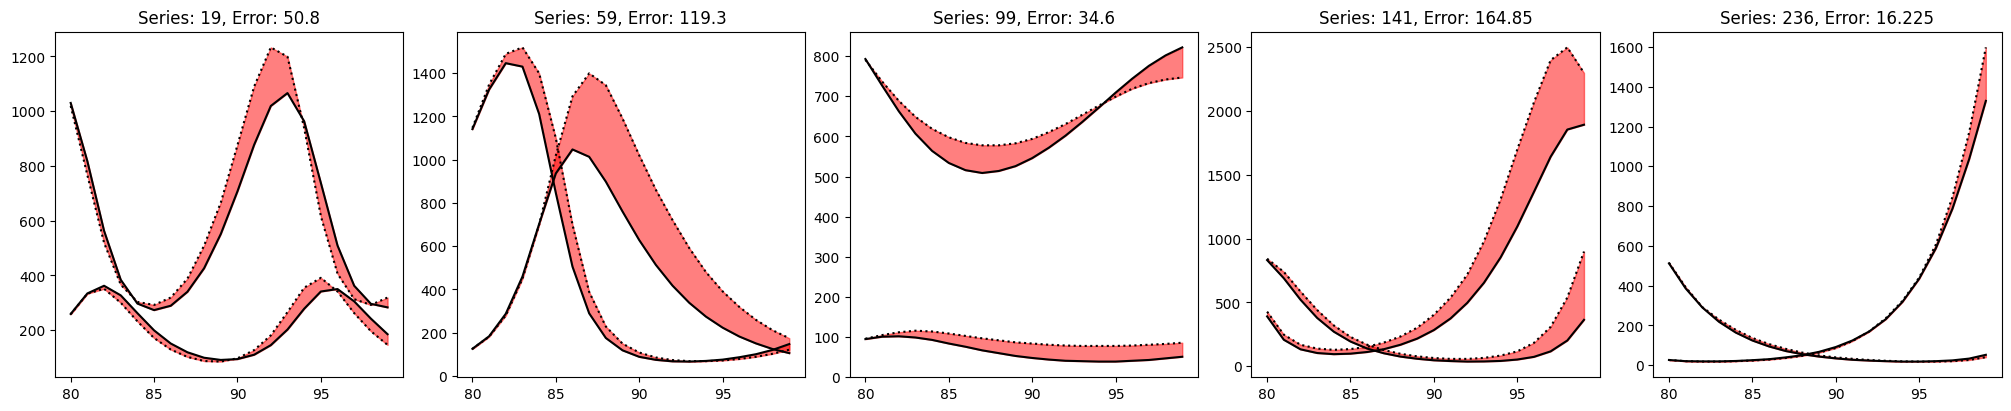

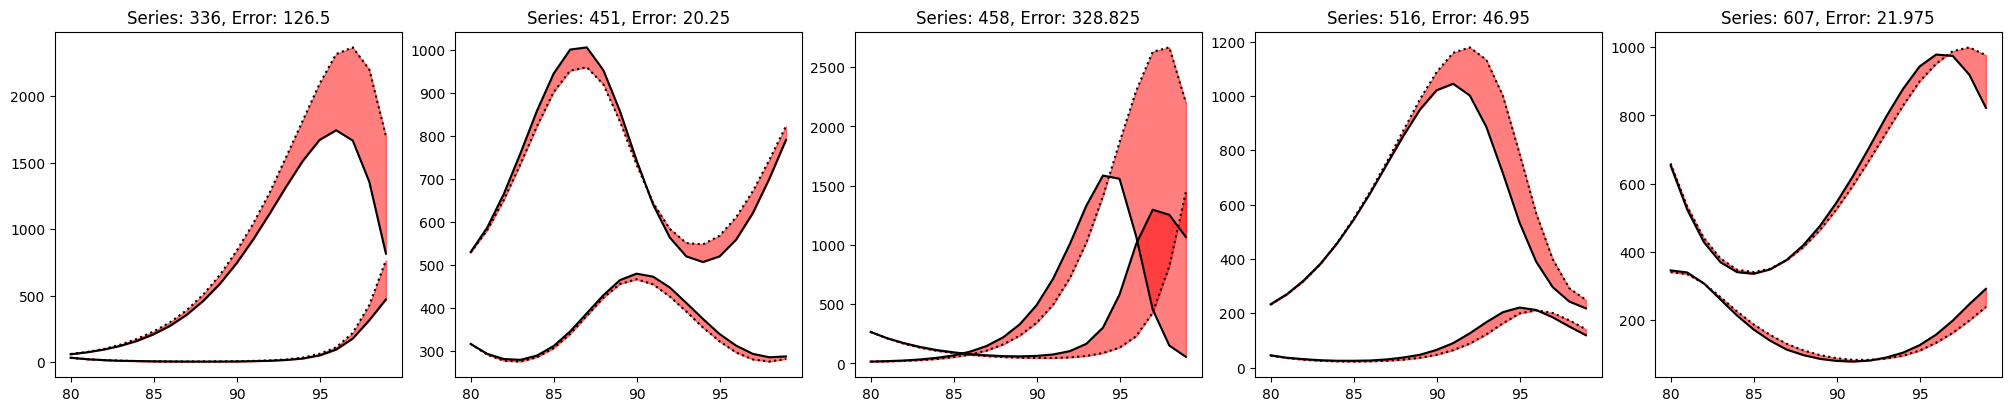

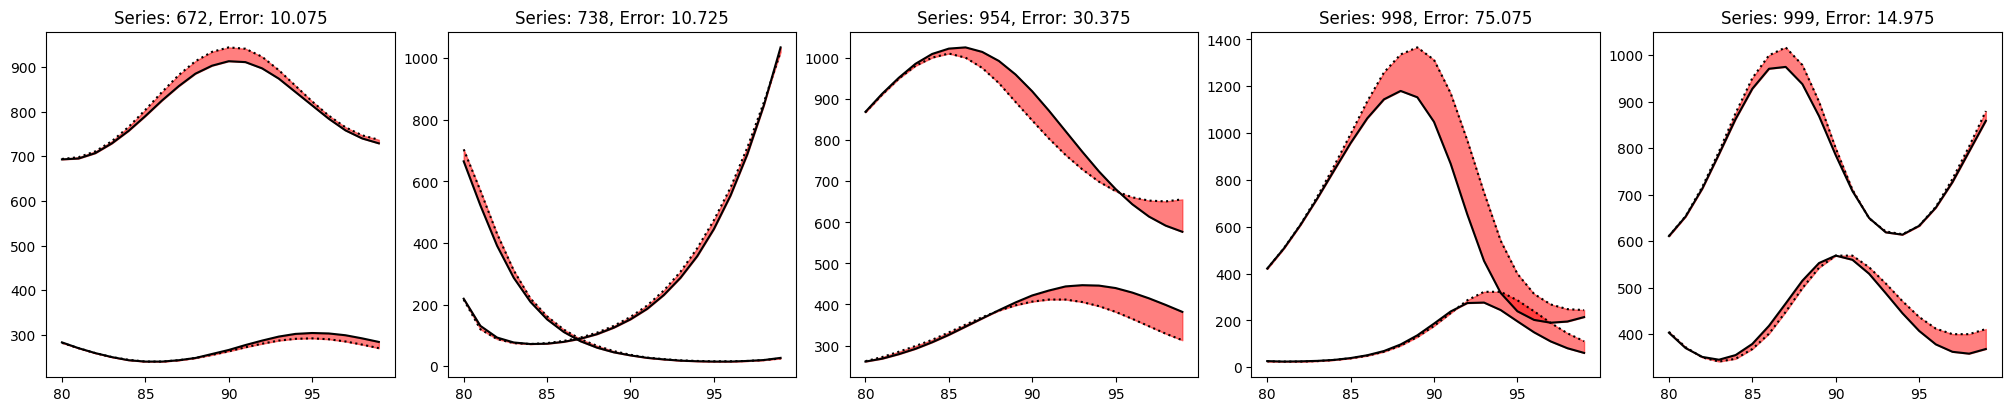


Experiment 3b - 6


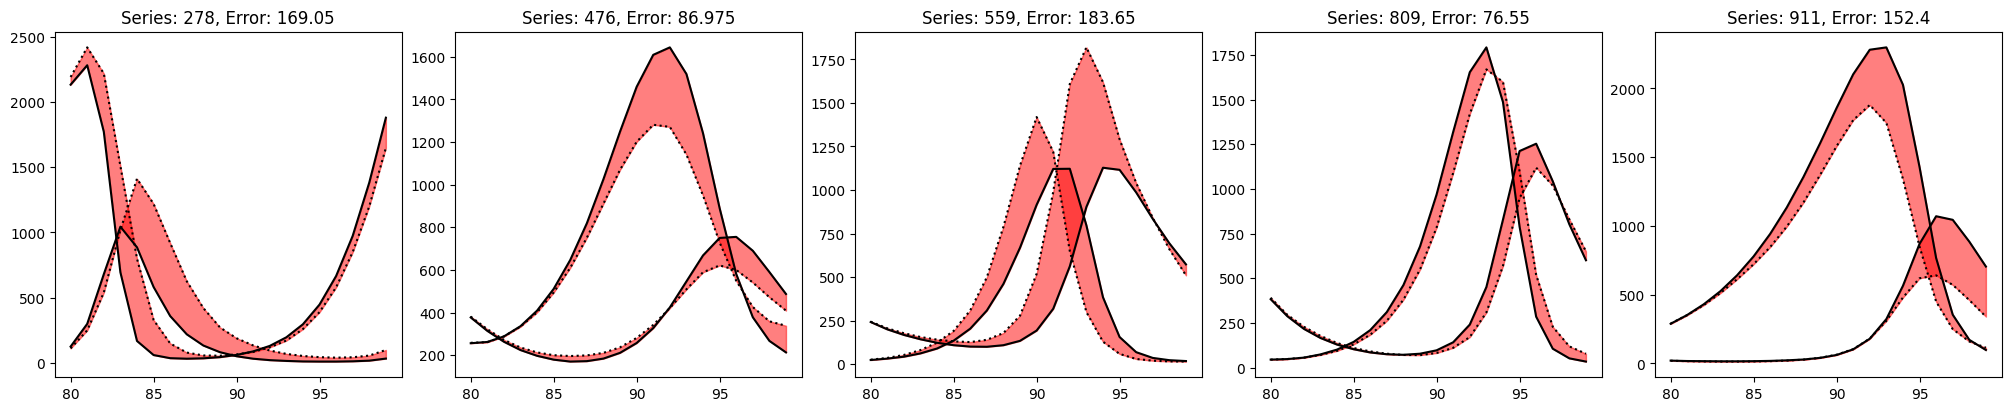

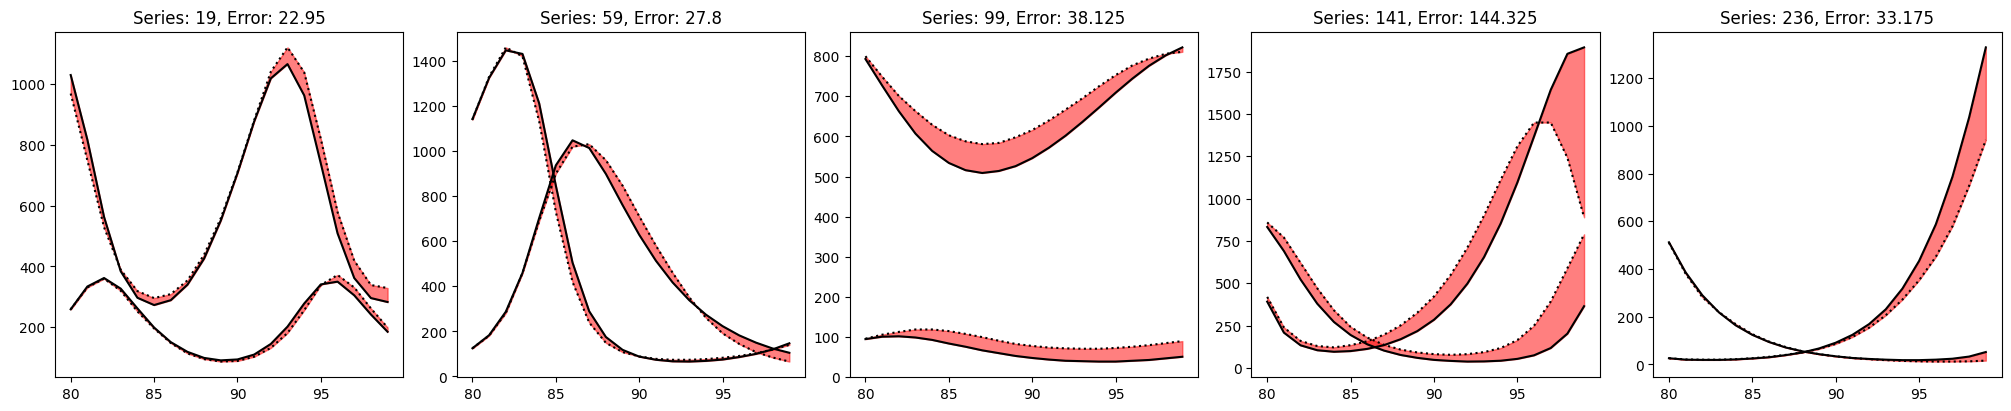

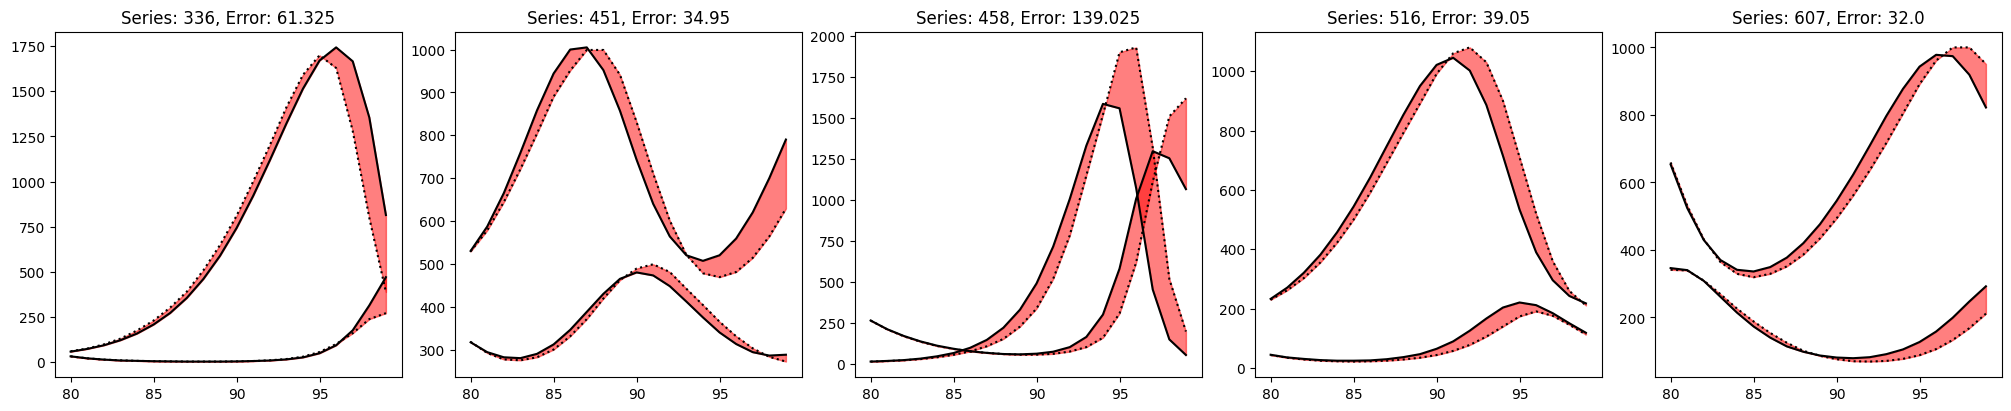

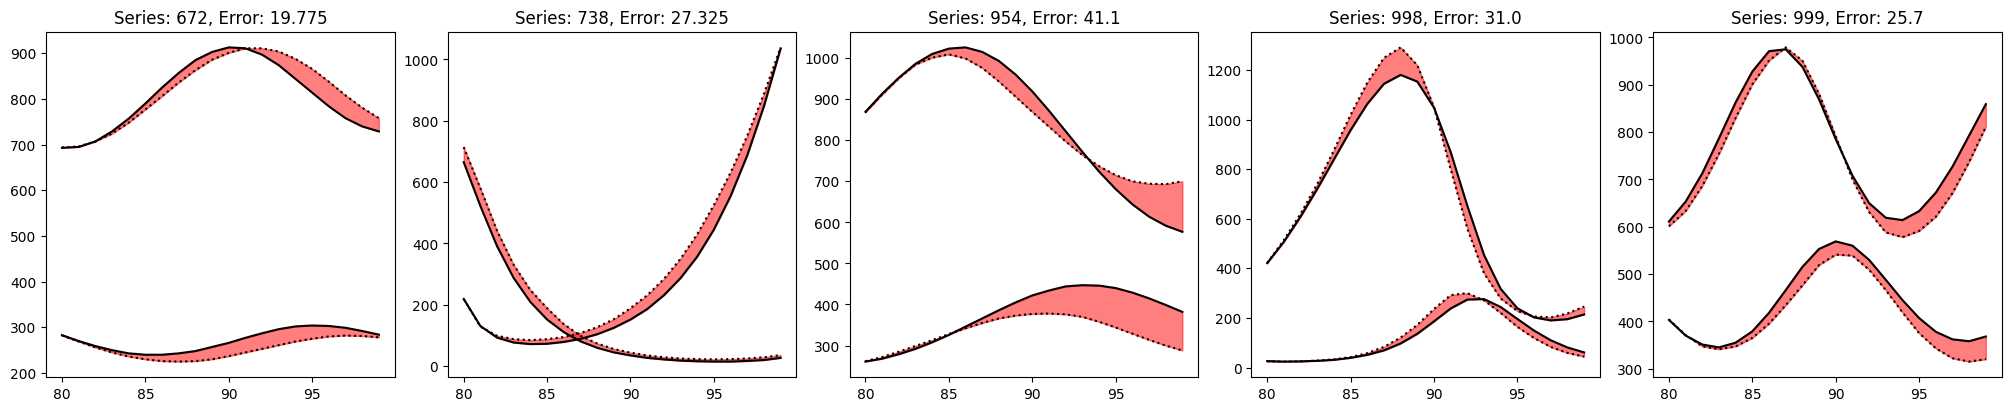

,series_id,MAE_7,max_dist_7,MAE_8,max_dist_8,MAE_6,max_dist_6
0,278,139.625,669.0,322.400,1520.0,169.050,815.0
1,476,108.900,473.0,58.925,210.0,86.975,378.0
2,559,134.650,587.0,140.475,498.0,183.650,1047.0
3,809,73.200,375.0,200.275,1210.0,76.550,310.0
4,911,164.150,835.0,101.875,355.0,152.400,686.0


In [2]:
forecasts3b = [ file for file in Path.cwd().iterdir() if "forecast_combined" in str(file)]
assert len(forecasts3b) == 3

dfs = []
for forecast in forecasts3b:
    match = re.search(r"expt_(\d+)_", str(forecast))
    if match:
        expt_number = match.group(1)
    else:
        raise TypeError(f"No experiment id found in path {forecast}")
    print(f"\nExperiment 3b - {expt_number}")
    df = visualise_forecasts(forecast, plots_per_row=5, eval_set="val", prefix=0)
    df = df.rename(columns={"MAE": f"MAE_{expt_number}",
                            "max_dist": f"max_dist_{expt_number}"})
    dfs.append(df)

df = reduce(lambda left, right: pd.merge(left, right, on="series_id"), dfs)
df.head()

Average MAE:
 - Expt 6: 69.31
 - Expt 7: 68.99
 - Expt 8: 94.77


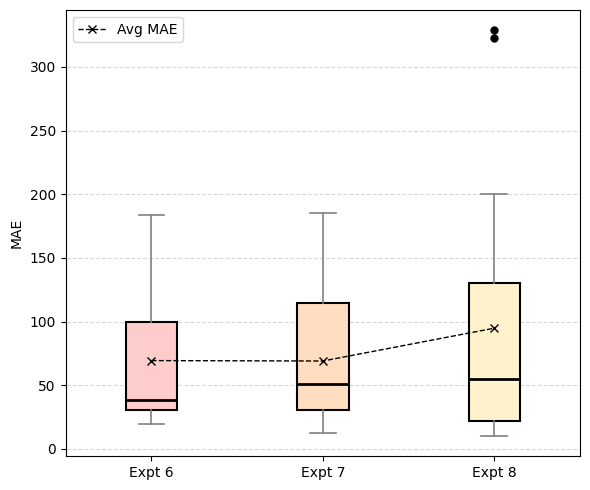

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from m2_cw.inference import boxplot_maes

labels = []
data = []
for i in range(6, 9):
    target = f"MAE_{i}"
    data.append(df[target].to_numpy())
    labels.append(f"Expt {i}")

fig, ax = boxplot_maes(data, labels)

fig.savefig(figpath / "results2")

plt.show()